In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import os

In [23]:
dataset = np.load('./dataset.npz')

In [24]:
a = dataset['th_true'][0]
np.asscalar(a)
dataset['th_true'].shape

(12609, 1)

Use the groundtruth pose of the robot as xˆ0 to initialize your filter and choose Pˆ 0 = diag{1, 1, 0.1}. Also assume a uniform 0.1 second sampling period.

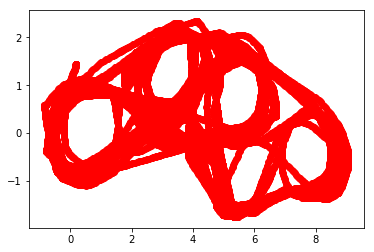

In [63]:
x = dataset['x_true'][0]
x = np.asscalar(x)

y = dataset['y_true'][0]
y = np.asscalar(y)

th = dataset['th_true'][0]
th = np.asscalar(th)

# initial position
pos = [x, y, th]
pos = np.array(pos) # 3x1

x = dataset['x_true']
y = dataset['y_true']
th = dataset['th_true']

postrue = np.hstack((x,y))

# postrue = np.array(postrue) # 3x1
x,y = postrue.T
plt.scatter(x,y, c='r')


(12608, 3)


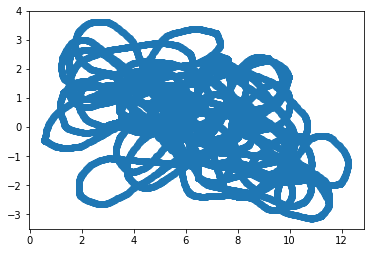

In [59]:
posfinal = []
for k in range(1, 12609):
    th = pos[2]
    head_mat = [[np.cos(th), np.sin(th), 0], [0,0,1]]
    head_mat = np.array(head_mat)
    head_mat = head_mat.T # 3x2

    v = dataset['v'][k]
    v = np.asscalar(v)

    om = dataset['om'][k]
    om = np.asscalar(om)

    vom_mat = [v, om]
    vom_mat = np.array(vom_mat)

    motion_model = np.matmul(head_mat, vom_mat)
    motion_model = motion_model * 0.1

    pos = pos + motion_model
    posfinal.append(pos)

posfinal = np.array(posfinal)

print(posfinal.shape)

x,y,z = posfinal.T
plt.scatter(x,y)

    
